In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [31]:
dataset=pd.read_csv('/content/flights.csv')
dataset.sample(5)

/tmp/ipython-input-1480536902.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset=pd.read_csv('/content/flights.csv')


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
538302,2015,2,5,4,B6,748,N603JB,LAS,JFK,1339,...,2341.0,132.0,0.0,0.0,NaN,0.0,0.0,132.0,0.0,0.0
1429013,2015,4,2,4,EV,4716,N27962,ATW,ORD,1345,...,1450.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
896669,2015,2,28,6,OO,2712,N875AS,PHX,PSP,1735,...,1737.0,-3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1456223,2015,4,4,6,AA,1347,N201AA,PIT,DFW,735,...,938.0,-10.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1277979,2015,3,24,2,WN,4555,N8616C,LAS,FNT,1035,...,1707.0,-8.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
df = dataset[['AIRLINE', 'FLIGHT_NUMBER', 'ARRIVAL_DELAY', 'DEPARTURE_DELAY', 'CANCELLED']]
df.sample(5)

,AIRLINE,FLIGHT_NUMBER,ARRIVAL_DELAY,DEPARTURE_DELAY,CANCELLED
172411,EV,4107,-2.0,2.0,0.0
762905,HA,45,-16.0,-12.0,0.0
1033264,DL,1734,-14.0,-5.0,0.0
813031,WN,1180,7.0,17.0,0.0
548108,EV,2563,-10.0,-6.0,0.0


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [34]:
df = df.copy()
df['delay'] = ((df['ARRIVAL_DELAY'] > 0) | (df['DEPARTURE_DELAY'] > 0) | (df['CANCELLED'] == 1)).astype(int)
df.sample(5)

,AIRLINE,FLIGHT_NUMBER,ARRIVAL_DELAY,DEPARTURE_DELAY,CANCELLED,delay
523228,OO,5514,120.0,124.0,0.0,1
490078,DL,2677,NaN,NaN,1.0,1
668296,UA,383,2.0,2.0,0.0,1
819873,DL,1880,15.0,5.0,0.0,1
982567,EV,5162,32.0,-4.0,0.0,1


In [35]:
df.drop(['ARRIVAL_DELAY', 'DEPARTURE_DELAY', 'CANCELLED','AIRLINE'], axis=1, inplace=True)
df.sample(5)

,FLIGHT_NUMBER,delay
837623,610,0
373791,782,0
668238,126,1
457126,1760,1
1135079,489,1


In [36]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('delay', axis=1), df['delay'], test_size=0.2, random_state=42)


In [37]:
pipeline=Pipeline([
    ('classifier',RandomForestClassifier())
])

In [38]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('classifier', RandomForestClassifier())])

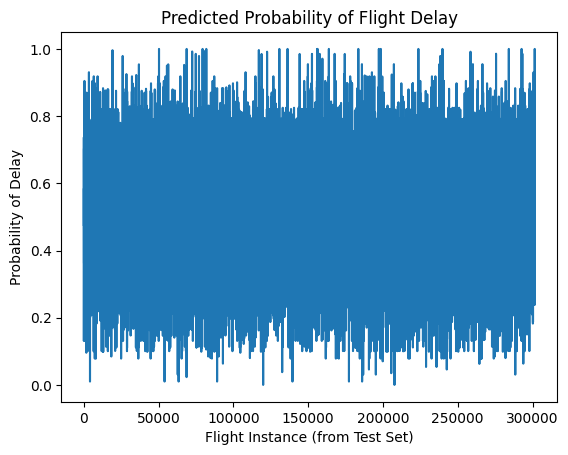

In [39]:
plt.plot(pipeline.predict_proba(X_test)[:,1])
plt.title('Predicted Probability of Flight Delay')
plt.xlabel('Flight Instance (from Test Set)')
plt.ylabel('Probability of Delay')
plt.show()

In [40]:
y_pred = pipeline.predict(X_test)
accuracy_score(y_test, y_pred)

0.5578033627549515

In [41]:
import pickle

pickle_model_path = "model.pkl"
with open(pickle_model_path, "wb") as f:
    pickle.dump(pipeline, f)

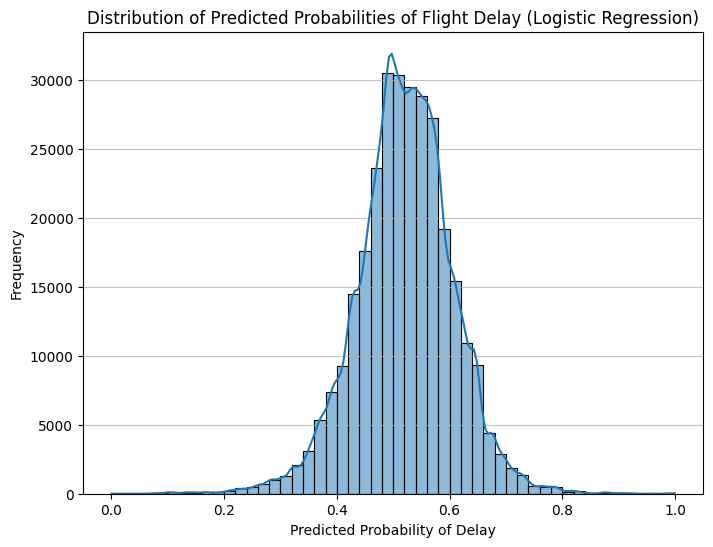

In [42]:
y_proba = pipeline.predict_proba(X_test)[:, 1]
plt.figure(figsize=(8, 6))
sns.histplot(y_proba, bins=50, kde=True)
plt.title('Distribution of Predicted Probabilities of Flight Delay (Logistic Regression)')
plt.xlabel('Predicted Probability of Delay')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()